In [102]:
from pycaret.anomaly import *

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [104]:
import matplotlib.pyplot as plt

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
pip install pretty_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


In [107]:
import pretty_confusion_matrix

In [108]:
from pretty_confusion_matrix import pp_matrix_from_data

In [109]:
df = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/df_min.csv')
y = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/Labels.csv')

In [110]:
df =df.drop(df.columns[0], axis=1)

In [111]:
scaler = StandardScaler()
scaler.fit(df)
df=pd.DataFrame(scaler.transform(df))

In [112]:
columns=['Node 11','Link 21','Link 22','Pressure 10']
df.columns=columns

In [113]:
df

Node 11   Link 21   Link 22  Pressure 10
0     -0.560490  8.324737  2.527433     0.193668
1     -0.560490  9.043777  1.537900     0.205012
2     -0.840344  9.043777  1.537900     0.217237
3     -0.840344  9.762817  1.537900     0.229711
4     -0.840344  9.762817  1.537900     0.241821
...         ...       ...       ...          ...
17515  0.558925 -0.303745 -0.441167     0.671786
17516 -0.000783  0.415295 -0.441167     0.711009
17517 -0.000783 -0.303745 -0.441167     0.735842
17518 -0.000783  0.415295 -0.441167     0.768762
17519 -0.280637 -0.303745 -0.441167     0.798884

[17520 rows x 4 columns]

In [114]:
X_train, X_test=train_test_split(df, test_size=0.2,random_state=3)

In [115]:
s=setup(X_train)

In [116]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

Clustering

In [163]:
cluster = create_model('cluster',fraction=0.3,n_clusters=4)
print(cluster)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.3, n_clusters=4, n_jobs=None, random_state=8685,
   use_weights=False)


In [164]:
plot_model(cluster, plot = 'umap')

In [165]:
predictions = predict_model(cluster, data = X_test)
predictions

Node 11   Link 21   Link 22  Pressure 10  Anomaly  Anomaly_Score
14658  1.398487 -0.303745  1.537900     0.497358        0       0.751458
16322 -0.560490 -1.022785 -1.430700     0.856866        1       0.952777
14447 -0.280637 -0.303745 -0.441167     0.802659        0       0.487509
7817   1.118633 -0.303745  1.537900     0.496841        0       0.675380
9004   1.678340 -0.303745  0.548366     0.460722        0       0.698895
...         ...       ...       ...          ...      ...            ...
2961  -1.120198  1.134335  0.548366    -1.494939        0       0.630982
16801 -0.560490 -0.303745 -1.430700     0.852229        0       0.780397
4550  -1.120198  1.134335  0.548366    -1.495897        0       0.631003
7955   1.118633 -1.022785  0.548366     0.528860        0       0.773399
3211  -0.840344  0.415295 -0.441167    -1.495169        0       0.700196

[3504 rows x 6 columns]

In [166]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Node 11       Link 21       Link 22   Pressure 10       Anomaly  \
count  1.752000e+04  1.752000e+04  1.752000e+04  1.752000e+04  17520.000000   
mean  -7.462321e-17 -3.244487e-17  1.881803e-16 -1.038236e-16      0.302283   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00      0.459260   
min   -1.679906e+00 -3.913191e+01 -1.627370e+01 -1.499519e+00      0.000000   
25%   -1.120198e+00 -3.037452e-01 -4.411669e-01 -1.486838e+00      0.000000   
50%   -7.826963e-04 -3.037452e-01  5.483663e-01  5.794942e-01      0.000000   
75%    8.387788e-01  4.152949e-01  5.483663e-01  7.139457e-01      1.000000   
max    2.797756e+00  9.762817e+00  3.516966e+00  8.868542e-01      1.000000   

       Anomaly_Score  
count   17520.000000  
mean      101.923168  
std        65.700532  
min         0.324324  
25%        81.719844  
50%       108.560076  
75%       146.036509  
max      2750.867846

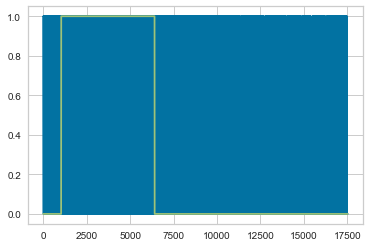

In [167]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

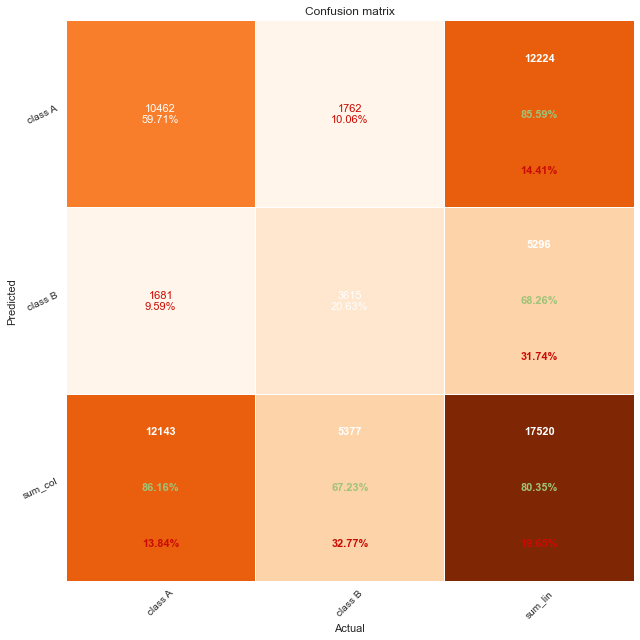

In [168]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

Isolation forest

In [90]:
iforest = create_model('iforest',fraction=0.3)
print(iforest)


IForest(behaviour='new', bootstrap=False, contamination=0.3, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=2448,
    verbose=0)


In [91]:
plot_model(iforest, plot = 'umap')

In [92]:
result = assign_model(iforest)
result

Node 11   Link 21   Link 22  Pressure 10  Anomaly  Anomaly_Score
7691  -0.280637 -0.303745 -1.430700     0.830500        0      -0.023142
4592  -1.120198  0.415295  0.548366    -1.495054        1       0.028241
11794  0.558925 -0.303745  0.548366     0.634995        0      -0.098584
15563 -0.000783 -0.303745 -1.430700     0.804556        1       0.012141
10417 -0.280637 -0.303745 -0.441167     0.800647        0      -0.042627
...         ...       ...       ...          ...      ...            ...
6400  -0.840344  1.134335  0.548366    -1.495954        1       0.008620
15288  0.838779 -0.303745 -0.441167     0.638904        0      -0.057781
11513  1.398487 -0.303745  0.548366     0.488487        0      -0.052853
1688  -1.400052 -0.303745 -1.430700    -1.483806        1       0.075625
5994  -1.120198  0.415295 -0.441167    -1.492831        0      -0.029666

[14016 rows x 6 columns]

In [93]:
predictions = predict_model(iforest, data = X_test)
predictions

Node 11   Link 21   Link 22  Pressure 10  Anomaly  Anomaly_Score
14658  1.398487 -0.303745  1.537900     0.497358        0      -0.033789
16322 -0.560490 -1.022785 -1.430700     0.856866        1       0.030337
14447 -0.280637 -0.303745 -0.441167     0.802659        0      -0.042941
7817   1.118633 -0.303745  1.537900     0.496841        0      -0.026854
9004   1.678340 -0.303745  0.548366     0.460722        1       0.010244
...         ...       ...       ...          ...      ...            ...
2961  -1.120198  1.134335  0.548366    -1.494939        0      -0.081192
16801 -0.560490 -0.303745 -1.430700     0.852229        0      -0.054667
4550  -1.120198  1.134335  0.548366    -1.495897        0      -0.063886
7955   1.118633 -1.022785  0.548366     0.528860        0      -0.025630
3211  -0.840344  0.415295 -0.441167    -1.495169        1       0.044460

[3504 rows x 6 columns]

In [94]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Node 11       Link 21       Link 22   Pressure 10       Anomaly  \
count  1.752000e+04  1.752000e+04  1.752000e+04  1.752000e+04  17520.000000   
mean  -7.462321e-17 -3.244487e-17  1.881803e-16 -1.038236e-16      0.298459   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00      0.457595   
min   -1.679906e+00 -3.913191e+01 -1.627370e+01 -1.499519e+00      0.000000   
25%   -1.120198e+00 -3.037452e-01 -4.411669e-01 -1.486838e+00      0.000000   
50%   -7.826963e-04 -3.037452e-01  5.483663e-01  5.794942e-01      0.000000   
75%    8.387788e-01  4.152949e-01  5.483663e-01  7.139457e-01      1.000000   
max    2.797756e+00  9.762817e+00  3.516966e+00  8.868542e-01      1.000000   

       Anomaly_Score  
count   17520.000000  
mean       -0.025713  
std         0.057854  
min        -0.104086  
25%        -0.073369  
50%        -0.031675  
75%         0.008283  
max         0.229853

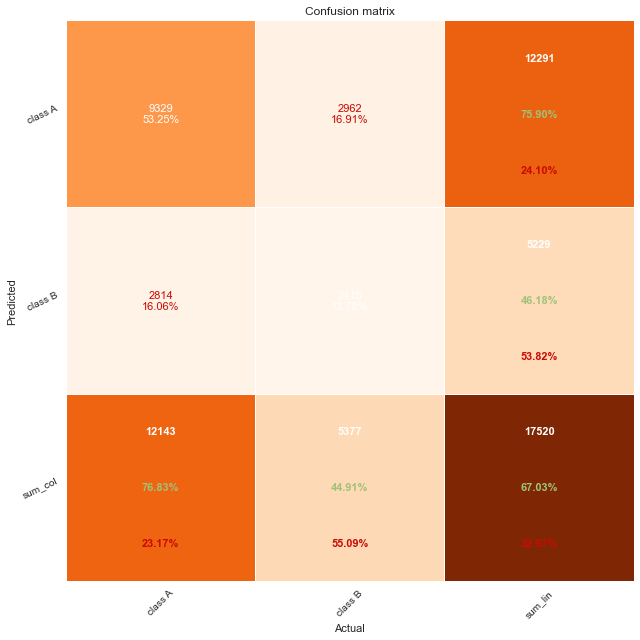

In [95]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

PCA

In [96]:
pca = create_model('pca',fraction=0.3)
print(pca)


PCA(contamination=0.3, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=2448, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)


In [101]:
plot_model(pca, plot = 'umap')

In [97]:
result = assign_model(pca)
result

Node 11   Link 21   Link 22  Pressure 10  Anomaly  Anomaly_Score
7691  -0.280637 -0.303745 -1.430700     0.830500        0     119.434176
4592  -1.120198  0.415295  0.548366    -1.495054        0     140.650245
11794  0.558925 -0.303745  0.548366     0.634995        0      94.691240
15563 -0.000783 -0.303745 -1.430700     0.804556        0     112.455018
10417 -0.280637 -0.303745 -0.441167     0.800647        0      98.256548
...         ...       ...       ...          ...      ...            ...
6400  -0.840344  1.134335  0.548366    -1.495954        1     147.701796
15288  0.838779 -0.303745 -0.441167     0.638904        0      78.829912
11513  1.398487 -0.303745  0.548366     0.488487        0     103.544036
1688  -1.400052 -0.303745 -1.430700    -1.483806        1     156.542100
5994  -1.120198  0.415295 -0.441167    -1.492831        0     129.628389

[14016 rows x 6 columns]

In [98]:
predictions = predict_model(pca, data = X_test)
predictions

Node 11   Link 21   Link 22  Pressure 10  Anomaly  Anomaly_Score
14658  1.398487 -0.303745  1.537900     0.497358        0     146.239953
16322 -0.560490 -1.022785 -1.430700     0.856866        0     144.386790
14447 -0.280637 -0.303745 -0.441167     0.802659        0      98.347412
7817   1.118633 -0.303745  1.537900     0.496841        0     140.906687
9004   1.678340 -0.303745  0.548366     0.460722        0     112.313252
...         ...       ...       ...          ...      ...            ...
2961  -1.120198  1.134335  0.548366    -1.494939        1     157.946820
16801 -0.560490 -0.303745 -1.430700     0.852229        0     128.170276
4550  -1.120198  1.134335  0.548366    -1.495897        1     157.971269
7955   1.118633 -1.022785  0.548366     0.528860        0     117.546945
3211  -0.840344  0.415295 -0.441167    -1.495169        0     117.025736

[3504 rows x 6 columns]

In [99]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Node 11       Link 21       Link 22   Pressure 10       Anomaly  \
count  1.752000e+04  1.752000e+04  1.752000e+04  1.752000e+04  17520.000000   
mean  -7.462321e-17 -3.244487e-17  1.881803e-16 -1.038236e-16      0.299943   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00      0.458246   
min   -1.679906e+00 -3.913191e+01 -1.627370e+01 -1.499519e+00      0.000000   
25%   -1.120198e+00 -3.037452e-01 -4.411669e-01 -1.486838e+00      0.000000   
50%   -7.826963e-04 -3.037452e-01  5.483663e-01  5.794942e-01      0.000000   
75%    8.387788e-01  4.152949e-01  5.483663e-01  7.139457e-01      1.000000   
max    2.797756e+00  9.762817e+00  3.516966e+00  8.868542e-01      1.000000   

       Anomaly_Score  
count   17520.000000  
mean      127.460281  
std        55.616615  
min        74.368839  
25%        98.146075  
50%       128.483799  
75%       147.814331  
max      2817.396712

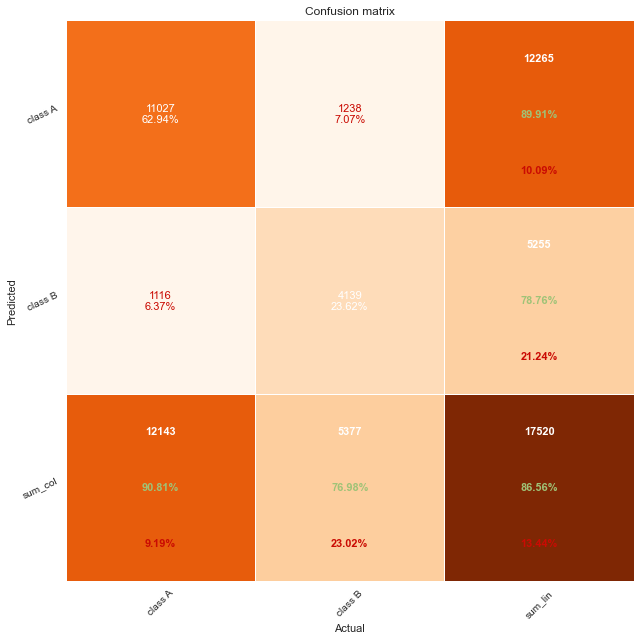

In [100]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])